In [ ]:
import pickle
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
import numpy as np
from sklearn.metrics import accuracy_score
import re
import pickle
import nltk.corpus
from nltk import tokenize
from nltk.tokenize import sent_tokenize,word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import tokenize
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
with open("/content/drive/MyDrive/Minor Project 2/data files4/word_to_idx.pkl","rb") as w2i:
    word_to_idx=pickle.load(w2i)
with open("/content/drive/MyDrive/Minor Project 2/data files4/idx_to_word.pkl","rb") as i2w:
    idx_to_word=pickle.load(i2w)
with open("/content/drive/MyDrive/Minor Project 2/data files4/embedding_matrix.pkl","rb") as em:
    embedding_matrix=pickle.load(em)
with open("/content/drive/MyDrive/Minor Project 2/data files4/x_train.pkl","rb") as tfi:
    x_train=pickle.load(tfi)
with open("/content/drive/MyDrive/Minor Project 2/data files4/y_train.pkl","rb") as tds:
    y_train=pickle.load(tds)

In [ ]:
max_len = 0
for cap in x_train:
    max_len = max(max_len,len(cap.split()))
print(max_len)

40


In [ ]:
x_train[:2]

array(['wikipedia manual style capital letters military terms referring initial letter capitalization therefore relevant allcaps discussion',
       'provide professional critics reviews'], dtype='<U4993')

In [ ]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
sw = set(stopwords.words("english"))

# remove stop words
def filter_words(word_list):
    useful_words = [ w for w in word_list if w not in sw ]
    return(useful_words)

def preprocess_data(dataset):
    data = dataset.copy()
    t = []
    for i in data:
        sentence = str(i)
        sentence = sentence.lower()
        sentence = re.sub(r'@\w+ | http | #\w+', '', sentence)
        t.append(sentence)


    #Removing punctuations, special characters and lemmatizing words to their base form
    val = [''.join([WordNetLemmatizer().lemmatize(re.sub('[^A-Za-z]',' ',text)) for text in lis]) for lis in t]
    
    a=[]
    for text in val:
        word_list = word_tokenize(text)
        text=filter_words(word_list)
        a.append(text)  
    
    train_text = []
    for i in a:
      train_text.append(' '.join(i))

    return train_text

In [ ]:
def data_generator(x):
  x_array = []
  for desc in x:
    seq = [word_to_idx[word] for word in desc.split() if word in word_to_idx]
    xi = pad_sequences([seq],maxlen=max_len,value=0,padding='post')[0]
    x_array.append(xi)
  return x_array
x_arr = data_generator(x_train)
x_arr = np.array(x_arr)
y_arr = np.array(y_train)
y_arr = y_arr.reshape((y_arr.shape[0],1))
y_arr.shape

(134951, 1)

In [ ]:
vocab_size = embedding_matrix.shape[0]
emb_dim = embedding_matrix.shape[1]
print(vocab_size,emb_dim)
print(max_len)

12849 300
40


In [ ]:
from keras.models import load_model

In [ ]:
models = load_model('/content/drive/MyDrive/Minor Project 2/data files4/model1/new_model_03')

In [ ]:
models.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 40, 300)           3854700   
_________________________________________________________________
dropout (Dropout)            (None, 40, 300)           0         
_________________________________________________________________
lstm (LSTM)                  (None, 40, 256)           570368    
_________________________________________________________________
dropout_1 (Dropout)          (None, 40, 256)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 40, 128)           197120    
_________________________________________________________________
dropout_2 (Dropout)          (None, 40, 128)           0         
_________________________________________________________________
attention (attention)        (None, 40, 128)           1

In [ ]:
test = ["Hey you bitch where are you from",
        "this is beautiful scene",
        "get lost from here i dont need your presence you are a idiot human",
        "i want your presence it make me feel happy staying with you",
        "you are very cute and innocent person",
        "india is great country with much excellent mind borned",
        "this is worst country terrorist is born",
        "you are a very idiot",
        "You must die as a evil person bitch",
        "you are a very nice person time pass so quick with you",
        "you are a very worst person i ever meet in my life",
        "maybe you should hang yourself"]
test_clean = preprocess_data(test)
test_arr = data_generator(test_clean)
test_arr = np.array(test_arr)

In [ ]:
models.predict_classes(x=test_arr)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([[1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0]], dtype=int32)

In [ ]:
models.predict(x=test_arr)

array([[0.99326915],
       [0.0045572 ],
       [0.99245185],
       [0.00758443],
       [0.00475439],
       [0.00485262],
       [0.96582085],
       [0.9953858 ],
       [0.99490696],
       [0.06445228],
       [0.9663981 ],
       [0.13720192]], dtype=float32)

In [ ]:
b = "{:.2f}".format(a[0][0]*100)

In [ ]:
100 - float(b)

0.6700000000000017

In [ ]:
float(a[0][0]*100)

99.3269145488739

In [ ]:
x_arr.shape

(134951, 40)

In [ ]:
y_pred = models.predict_classes(x=x_arr)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
y_pred.shape

(134951, 1)

In [ ]:
print(np.unique(y_pred, return_counts=True))

(array([0, 1], dtype=int32), array([107337,  27614]))


In [ ]:

print(np.unique(y_arr, return_counts=True))

(array([0, 1]), array([108595,  26356]))


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_arr, y_pred)

array([[105887,   2708],
       [  1450,  24906]])

In [ ]:
accuracy_score(y_arr, y_pred)

0.9691888166816104

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_arr,y_pred)

0.9229571984435798

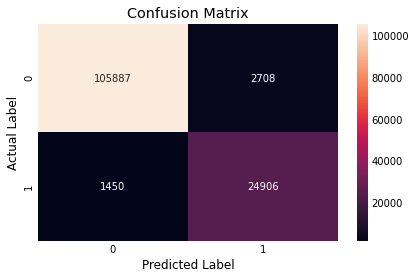

In [ ]:
cm = confusion_matrix(y_arr, y_pred)
fig = sns.heatmap(cm, annot=True, fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show(fig)